In [1]:
%matplotlib inline 
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx
import ipywidgets as wg
from ipywidgets import Layout, Button, Box, VBox, HBox
from IPython.display import display
import collections, randomcolor, time, warnings
warnings.filterwarnings('ignore')

In [2]:
bad = ['Dem. Rep. of the Congo','Kuwait','Algeria','Saudi Arabia','United Arab Emirates',
       'Angola','Azerbaijan','Curaçao',]
Países = ['Brunei Darussalam', 'Peru', 'Greece', 'Slovakia', 'Thailand', 'Denmark', 'Austria', 'Slovenia', 
          'Finland', 'Belgium', 'Germany', 'Spain', 'Korea', 'Philippines', 'Hungary', 'Viet Nam', 'South Africa',
          'Brazil', 'Argentina', 'India', 'Lithuania', 'United Kingdom', 'Canada', 'Netherlands', 
          'Russian Federation', 'Poland', 'Italy', 'Colombia', 'Mexico', 'Cambodia', 'Switzerland', 'Morocco', 
          'Norway', 'Japan', 'Croatia', 'Luxembourg', 'Tunisia', 'Turkey', 'USA', 'Czechia', 'Sweden', 'Latvia',
          'Malta', 'Singapore', 'Bulgaria', 'Portugal', 'Iceland', 'Romania', 'Saudi Arabia', 'Chile', 'Estonia', 
          'France', 'China, Hong Kong SAR', 'China', 'Australia', 'Ireland', 'New Zealand', 'Malaysia', 
          'Costa Rica', 'Indonesia', 'Cyprus', 'Israel']

Developed=['Austria','Belgium','Denmark','Finland','France','Germany','Greece','Ireland','Italy','Luxembourg',
'Netherlands','Portugal','Spain','Sweden','United Kingdom','Bulgaria','Croatia','Cyprus','Czechia','Estonia',
'Hungary','Latvia','Lithuania','Malta','Poland','Romania','Slovakia','Slovenia','Iceland','Norway','Switzerland',
'Australia','Canada','Japan','New Zealand','USA']

Nondevel=[t for t in Países if t not in Developed]
tech ={'high':[17,8,14] , 'low':[18,5,6,3,4]}

In [3]:
dir1 = 'C:\\Users\\Usuario\\Dropbox\\Eafit\\3-Third run\\Data\\'
dir2 = 'C:\\Users\\Usuario\\Documents\\Comtrade\\Second run\\'
dir3 = 'C:\\Users\\Usuario\\Dropbox\\Eafit\\Tesis Maestría\\Análisis de red\\'

In [7]:
data = pd.read_pickle(dir2 + 'panel_full.pkl')
#data = pd.read_excel(dir1 + 'panel.xlsx')

In [8]:
data[['Industria']]= data[['Industria']].astype(np.int64)
data[['Año']]= data[['Año']].astype(np.int64)

In [58]:
data_h = data[data['Industria'].isin(tech['high'])]
data_l = data[data['Industria'].isin(tech['low'])]

In [9]:
def weight_industry(data, var, year, i, p):
    df = data[ (data['Año'] == year) & (data['Industria'] == i )][['Origen', 'Destino', var]]
    df = df[ df[var]>(df[var].sum()*p) ]
    return df.values.tolist()

In [10]:
def weight_industry_2(data, year, i, p):
    df = data[ data['Year'] == year ][['Importer','Países\Industrias', i]]
    df = df[ df[i]>(df[i].sum()*p) ]
    #df = df[df['Importer'].isin(Países)]
    return df.values.tolist()

In [11]:
def function_weights():
    global graph
    for e in graph.edges(data=True):
        if e[2]['weight']==0:
            e[2]['weight']=1
        else:
            e[2]['weight']=1/e[2]['weight']

In [31]:
def multigraph_year(data, var, year, p):
    global graph, df
    df = data[data['Año']==year][['Origen','Destino',var]]
    df = df[df[var]>= p*df[var].sum()]
    df = df.values.tolist()
    
    graph = nx.MultiGraph()
    graph.add_weighted_edges_from(df)
    
def graph_year(data, var, year, p):
    global graph, df
    df = data[data['Año']==year][['Origen','Destino',var]]
    df = df[df[var]>= p*df[var].sum()]
    df = df.values.tolist()
    
    graph = nx.Graph()
    graph.add_weighted_edges_from(df)
    
def multidigraph_year(data, var, year, p):
    global graph
    df = data[data['Año']==year][['Origen','Destino',var]]
    df = df[df[var]>= p*df[var].sum()]
    df = df.values.tolist()
    
    graph = nx.MultiDiGraph()
    graph.add_weighted_edges_from(df)

In [33]:
def industry_den(data, var,  i, p):
    global industry, V, E
    
    #Information
    industry, V, E = ([] for j in range(3))
    for y in range(1995,2012):
        grafo = nx.DiGraph()
        #grafo.add_weighted_edges_from(weight_industry(data, var, y, i, p))
        grafo.add_weighted_edges_from(weight_industry_2(data, y, i, p))
        industry.append(nx.density(grafo)), V.append(grafo.number_of_nodes()), E.append(grafo.number_of_edges())                        
    
    #Plot
    fig = plt.figure(1,figsize=(14, 6))
    gridspec.GridSpec(3,3)
    plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
    plt.xlabel('Years'), plt.ylabel('Graph density'), 
    title = ('Density, Sector: '+str(i))
             #+'\n'+ pd.read_excel(dir1+'industries_names.xlsx').iloc[[i-1]].get_values()[0][1])
    plt.title(title)
    plt.plot(range(1995,2012),industry,'r')
    
    plt.subplot2grid((3,3),(0,2))
    plt.plot(range(1995,2012), V), plt.title('Number of vertices through time')
    plt.subplot2grid((3,3),(1,2))
    plt.plot(range(1995,2012), E), plt.title('Number of edges through time')
    fig.tight_layout()
    
    direc = (dir3+'Imagenes\\' 'sector-' + str(i) +'-p-'+ str(p) +'_eng.pdf')
    plt.savefig(direc, format='pdf', dpi=1000)
    
    #return plt.show()

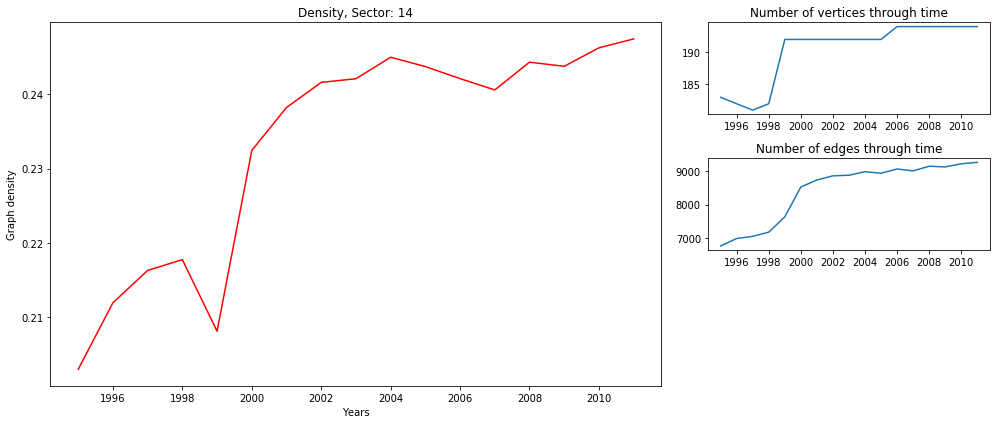

In [34]:
industry_den(data, 'Offshoring', 14, 0)

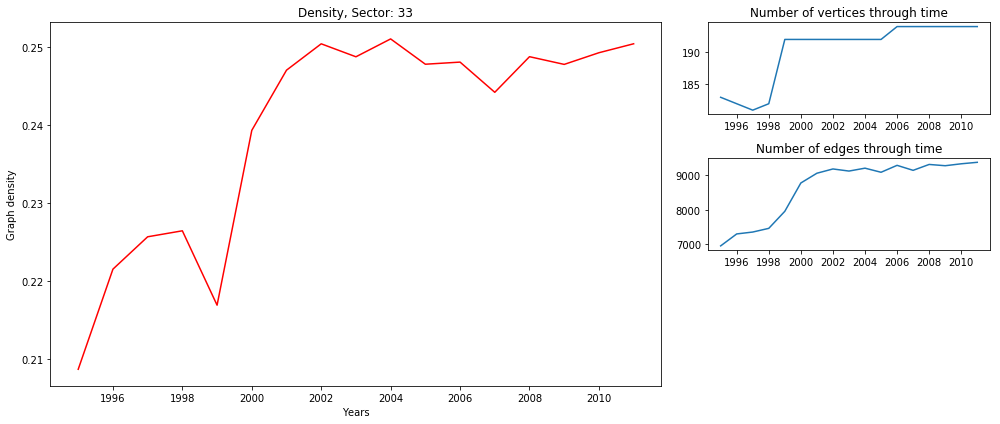

In [35]:
industries_ = []
for k in range(1,34):
    industry_den(data, 'Offshoring', k, 0)
    industries_.append(industry)

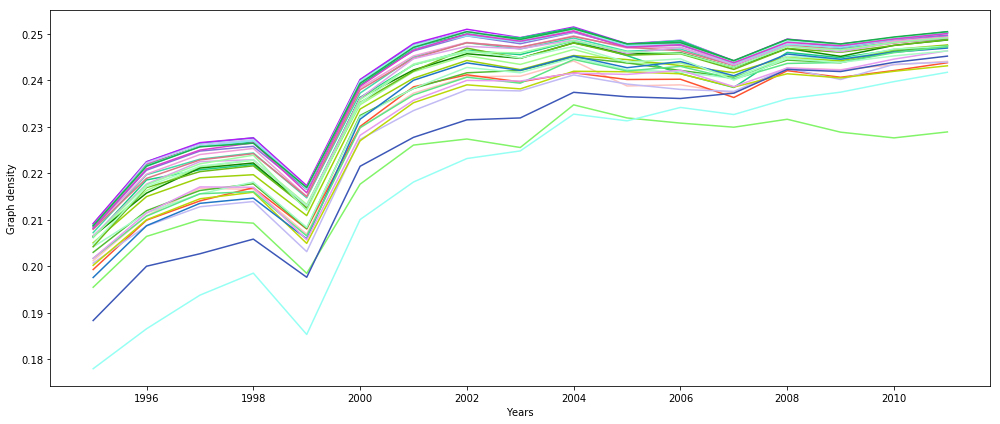

In [36]:
import randomcolor
def multiplot(list_):
    rand_color = randomcolor.RandomColor()
    fig = plt.figure(figsize=(14,6))
    for ind in list_:
        plt.plot( range(1995,2012), ind, color = rand_color.generate()[0])
    plt.xlabel('Years'), plt.ylabel('Graph density')
    fig.tight_layout()
    
    direc = dir3 + 'Imagenes\\all-sec_eng.pdf'
    plt.savefig(direc, format='pdf', dpi=1000)
    return plt.show()

multiplot(industries_)

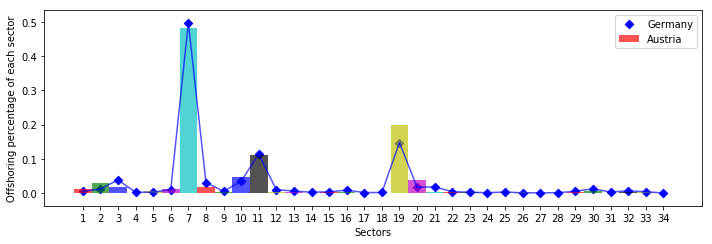

In [48]:
year = 2011
data = pd.read_excel(dir1+'panel' + str(year) + '.xlsx')
d1 = data[data['Países\Industrias']=='Colombia'][data['Importer'] == 'Austria']
d2 = data[data['Países\Industrias']=='Colombia'][data['Importer'] == 'Germany']

plot = [ d1[i].sum() for i in range(1,35) ]
plot = [ i/sum(plot) for i in plot ]
plot2 = [ d2[i].sum() for i in range(1,35) ]
plot2 = [ i/sum(plot2) for i in plot2 ]

x = [ i+1 for i in range(34) ]
len_x = len(x)
index = np.arange(len_x)
fig , ax = plt.subplots( figsize=(10, 3.5) )
bar_width , opacity , colors = 1 , 0.68 , 'rgbkymc'

rects1 = plt.bar(x , plot , bar_width , alpha = opacity , color = colors, label='Austria')
plt.plot(x , plot2 , alpha = opacity , color = 'b')
plt.scatter(x , plot2 , c='b'  , marker='D' , alpha=1, label='Germany')

plotr , xor = zip(*sorted(zip(plot, x), reverse=True)) 
plt.xlabel('Sectors') , plt.ylabel('Offshoring percentage of each sector')
plt.xticks(index + bar_width, x)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
plt.legend() , plt.tight_layout()

sname = dir3 + 'Imagenes\\Ger-Aus_eng.pdf'
plt.savefig(sname, format='pdf', dpi=1000)
plt.show()


$*$ Sector más grande:

In [13]:
Variables , Sector = ['Offshoring', 'Offshoring_1', 'Offshoring_2', 'Offp'] , {}
for var in Variables:
    Sector[var] = [ (data[data['Industria']== i][var].sum() , i) for i in range(1,35)  ]
    Sector[var] = sorted(Sector[var], key=lambda tup: tup[0], reverse=True)
    Sector[var] = (Sector[var][0][1], Sector[var][-2][1])
Sector

{'Offp': (7, 27),
 'Offshoring': (7, 27),
 'Offshoring_1': (10, 29),
 'Offshoring_2': (7, 27)}

In [59]:
frames , S_hl = {'high':data_h, 'low':data_l} , {}
for t in ['high', 'low']:
    ind = set(frames[t]['Industria'])
    S_hl[t] =  [ (frames[t][frames[t]['Industria']==i]['Offshoring'].sum() , i) for i in ind  ]
    S_hl[t] = sorted(S_hl[t], key=lambda tup: tup[0], reverse=True)
    S_hl[t] = (S_hl[t][0][1], S_hl[t][-1][1])
S_hl

{'high': (14, 17), 'low': (18, 5)}

$*$ Desarrollado más grande:

In [222]:
C = {}
for var in Variables:
    C[var] = [ (data[data['Origen']==p][var].sum(), p) for p in Developed ]
    C[var] = sorted(C[var], key=lambda tup: tup[0], reverse=True)
    C[var] = (C[var][0][1], C[var][-1][1])
C

{'Offp': ('USA', 'Iceland'),
 'Offshoring': ('USA', 'Malta'),
 'Offshoring_1': ('USA', 'Malta'),
 'Offshoring_2': ('USA', 'Iceland')}

In [46]:
D_hl = {}
for t in ['high', 'low']:
    D_hl[t] =  [ (frames[t][frames[t]['Origen']==p]['Offshoring'].sum() , p) for p in Developed  ]
    D_hl[t] = sorted(D_hl[t], key=lambda tup: tup[0], reverse=True)
    D_hl[t] = (D_hl[t][0][1], D_hl[t][-1][1])
D_hl

{'high': ('USA', 'Iceland'), 'low': ('USA', 'Iceland')}

$*$ En desarrollo más grande:

In [223]:
C_n = {}
for var in Variables:
    C_n[var] = [ (data[data['Origen']==p][var].sum(), p) for p in Nondevel ]
    C_n[var] = sorted(C_n[var], key=lambda tup: tup[0], reverse=True)
    C_n[var] = (C_n[var][0][1], C_n[var][-1][1])
C_n

{'Offp': ('China', 'Brunei Darussalam'),
 'Offshoring': ('China', 'Brunei Darussalam'),
 'Offshoring_1': ('China', 'Brunei Darussalam'),
 'Offshoring_2': ('China', 'Brunei Darussalam')}

In [47]:
N_hl = {}
for t in ['high', 'low']:
    N_hl[t] =  [ (frames[t][frames[t]['Origen']==p]['Offshoring'].sum() , p) for p in Nondevel  ]
    N_hl[t] = sorted(N_hl[t], key=lambda tup: tup[0], reverse=True)
    N_hl[t] = (N_hl[t][0][1], N_hl[t][-1][1])
N_hl

{'high': ('China', 'Brunei Darussalam'), 'low': ('China', 'Brunei Darussalam')}

$*$ Año más grande:

In [224]:
A = {}
for var in Variables:
    A[var] = [ (data[data['Año']==y][var].sum() , y) for y in range(1995, 2012)]
    A[var] = sorted(A[var], key=lambda tup: tup[0], reverse=True)
    A[var] = (A[var][0][1] , A[var][-1][1])
A

{'Offp': (2011, 1996),
 'Offshoring': (2011, 1995),
 'Offshoring_1': (2011, 1996),
 'Offshoring_2': (2011, 1995)}

$*$ De mayor centralidad:

In [46]:
#Degree centrality graph
DC = {}
for var in Variables:
    DC[var] = []
    for year in range(1995, 2012):
        multigraph_year(data, var, year, 0)
        d = nx.degree_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        DC[var].append( ( d[c] , c ) )
    DC[var] = sorted(DC[var], key=lambda tup: tup[0], reverse=True)[0][1]
DC

{'Offp': 'Canada',
 'Offshoring': 'Canada',
 'Offshoring_1': 'Canada',
 'Offshoring_2': 'Canada'}

In [65]:
DC_hl = {}
for t in ['high', 'low']:
    DC_hl[t] = []
    for year in range(1995,2012):
        multigraph_year(frames[t], 'Offshoring', year, 0.000000005)
        d = nx.degree_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        DC_hl[t].append( (d[c],c, year) )
    DC_hl[t] = sorted(DC_hl[t], key=lambda tup: tup[0], reverse=True)[0]
DC_hl

{'high': (3.154696132596685, 'United Kingdom', 1996),
 'low': (5.56544502617801, 'Canada', 2003)}

In [57]:
#Out Degree centrality digraph
DC2 = {}
for var in Variables:
    DC2[var] = []
    for year in range(1995, 2012):
        multidigraph_year(data, var, year, 0.00000000005)
        d = nx.out_degree_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        DC2[var].append( ( d[c] , c ) )
    DC2[var] = sorted(DC2[var], key=lambda tup: tup[0], reverse=True)[0][1]
DC2

{'Offp': 'Germany',
 'Offshoring': 'Germany',
 'Offshoring_1': 'Germany',
 'Offshoring_2': 'Germany'}

In [69]:
DC2_hl = {}
for t in ['high', 'low']:
    DC2_hl[t] = []
    for year in range(1995,2012):
        multidigraph_year(frames[t], 'Offshoring', year)
        d = nx.out_degree_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        DC2_hl[t].append( (d[c],c, year) )
    DC2_hl[t] = sorted(DC2_hl[t], key=lambda tup: tup[0], reverse=True)[0]
DC2_hl

{'high': (2.966666666666667, 'Germany', 1997),
 'low': (4.944444444444445, 'Germany', 1997)}

In [15]:
#Betweenness centrality
BC = {}
for var in Variables:
    BC[var] = []
    for year in range(1995, 2012):
        multigraph_year(data, var, year)
        d = nx.betweenness_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        BC[var].append( ( d[c] , c ) )
    BC[var] = sorted(BC[var], key=lambda tup: tup[0], reverse=True)[0][1]
BC

{'Offp': 'Japan',
 'Offshoring': 'Japan',
 'Offshoring_1': 'Japan',
 'Offshoring_2': 'Japan'}

In [16]:
#Betweenness centrality digraph
BC = {}
for var in Variables:
    BC[var] = []
    for year in range(1995, 2012):
        multidigraph_year(data, var, year)
        d = nx.betweenness_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        BC[var].append( ( d[c] , c ) )
    BC[var] = sorted(BC[var], key=lambda tup: tup[0], reverse=True)[0][1]
BC

{'Offp': 'Canada',
 'Offshoring': 'Canada',
 'Offshoring_1': 'Canada',
 'Offshoring_2': 'Canada'}

In [18]:
#Betweenness centrality digraph, function_weights()
BC = {}
for var in Variables:
    BC[var] = []
    for year in range(1995, 2012):
        multidigraph_year(data, var, year)
        function_weights()
        d = nx.betweenness_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        BC[var].append( ( d[c] , c ) )
    BC[var] = sorted(BC[var], key=lambda tup: tup[0], reverse=True)[0][1]
BC

{'Offp': 'Canada',
 'Offshoring': 'Canada',
 'Offshoring_1': 'Canada',
 'Offshoring_2': 'Canada'}

In [72]:
BC_hl = {}
for t in ['high', 'low']:
    BC_hl[t] = []
    for year in range(1995,2012):
        multigraph_year(frames[t], 'Offshoring', year)
        d = nx.betweenness_centrality(graph, weight='weight')
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        BC_hl[t].append( (d[c],c, year) )
    BC_hl[t] = sorted(BC_hl[t], key=lambda tup: tup[0], reverse=True)[0]
BC_hl

{'high': (0.028110256966545913, 'Japan', 1995),
 'low': (0.028110256966545913, 'Japan', 1995)}

$*$ Notice that Eigenvector, pagerank centralities are trivial for these networks
$\\*$ Notice that Katz, Katz numpy, communicability betweenness centralities aren't implemented for multigraphs

In [228]:
#closeness centrality graph
CC = {}
for var in Variables:
    CC[var] = []
    for year in range(1995, 2012):
        multigraph_year(var, year)
        d = nx.closeness_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        CC[var].append( ( d[c] , c ) )
    CC[var] = sorted(CC[var], key=lambda tup: tup[0], reverse=True)[0][1]
CC

{'Offp': 'Poland',
 'Offshoring': 'Poland',
 'Offshoring_1': 'Poland',
 'Offshoring_2': 'Poland'}

In [229]:
#closeness centrality digraph
CC2 = {}
for var in Variables:
    CC2[var] = []
    for year in range(1995, 2012):
        multidigraph_year(var, year)
        d = nx.closeness_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        CC2[var].append( ( d[c] , c ) )
    CC2[var] = sorted(CC2[var], key=lambda tup: tup[0], reverse=True)[0][1]
CC2

{'Offp': 'Germany',
 'Offshoring': 'Germany',
 'Offshoring_1': 'Germany',
 'Offshoring_2': 'Germany'}

In [230]:
#Current flow closeness graph
CFC = {}
for var in Variables:
    CFC[var] = []
    for year in range(1995, 2012):
        multigraph_year(var, year)
        d = nx.current_flow_closeness_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        CFC[var].append( ( d[c] , c ) )
    CFC[var] = sorted(CFC[var], key=lambda tup: tup[0], reverse=True)[0][1]
CFC

{'Offp': 'USA',
 'Offshoring': 'USA',
 'Offshoring_1': 'USA',
 'Offshoring_2': 'China'}

In [231]:
#Edge betweenness centrality graph
EBC = {}
for var in Variables:
    EBC[var] = []
    for year in range(1995, 2012):
        multigraph_year(var, year)
        d = nx.edge_betweenness_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        EBC[var].append( ( d[c] , c ) )
    EBC[var] = sorted(EBC[var], key=lambda tup: tup[0], reverse=True)[0][1]
EBC

{'Offp': ('Slovenia', 'Timor-Leste'),
 'Offshoring': ('Slovenia', 'Timor-Leste'),
 'Offshoring_1': ('Slovenia', 'Timor-Leste'),
 'Offshoring_2': ('Slovenia', 'Timor-Leste')}

In [232]:
#Edge betweenness centrality digraph  (Costo en el camino más corto)
EBC2 = {}
for var in Variables:
    EBC2[var] = []
    for year in range(1995, 2012):
        multidigraph_year(var, year)
        d = nx.edge_betweenness_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        EBC2[var].append( ( d[c] , c ) )
    EBC2[var] = sorted(EBC2[var], key=lambda tup: tup[0], reverse=True)[0][1]
EBC2

{'Offp': ('Slovenia', 'Timor-Leste'),
 'Offshoring': ('Slovenia', 'Timor-Leste'),
 'Offshoring_1': ('Slovenia', 'Timor-Leste'),
 'Offshoring_2': ('Slovenia', 'Timor-Leste')}

In [233]:
multidigraph_year('Offshoring' , 1995)
d = nx.edge_betweenness_centrality(graph)
c = [p for p in d.keys() if d[p]== max(d.values())][0]
c1 = [p for p in d.keys() if d[p]== min(d.values())][0]

d[c], c, d[c1], c1

(0.0009514490323471079,
 ('Indonesia', 'Timor-Leste'),
 3.0024620188554615e-05,
 ('Peru', 'Sri Lanka'))

In [234]:
#Current Flow Betweenness centrality graph
CFB = {}
for var in Variables:
    CFB[var] = []
    for year in range(1995, 2012):
        multigraph_year(var, year)
        d = nx.current_flow_betweenness_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        CFB[var].append( ( d[c] , c ) )
    CFB[var] = sorted(CFB[var], key=lambda tup: tup[0], reverse=True)[0][1]
CFB

{'Offp': 'Russian Federation',
 'Offshoring': 'Russian Federation',
 'Offshoring_1': 'Russian Federation',
 'Offshoring_2': 'Russian Federation'}

In [235]:
#Edge Current Flow Betweenness centrality graph
ECFB = {}
for var in Variables:
    ECFB[var] = []
    for year in range(1995, 2012):
        multigraph_year(var, year)
        d = nx.edge_current_flow_betweenness_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        ECFB[var].append( ( d[c] , c ) )
    ECFB[var] = sorted(ECFB[var], key=lambda tup: tup[0], reverse=True)[0][1]
ECFB

{'Offp': ('Russian Federation', 'USA'),
 'Offshoring': ('Russian Federation', 'USA'),
 'Offshoring_1': ('Russian Federation', 'USA'),
 'Offshoring_2': ('Brunei Darussalam', 'China, Hong Kong SAR')}

In [236]:
#load centrality Digraph
LC = {}
for var in Variables:
    LC[var] = []
    for year in range(1995, 2012):
        multidigraph_year(var, year)
        d = nx.load_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        LC[var].append( ( d[c] , c ) )
    LC[var] = sorted(LC[var], key=lambda tup: tup[0], reverse=True)[0][1]
LC

{'Offp': 'Canada',
 'Offshoring': 'Canada',
 'Offshoring_1': 'Canada',
 'Offshoring_2': 'Canada'}

In [237]:
#harmonic centrality Digraph
HC = {}
for var in Variables:
    HC[var] = []
    for year in range(1995, 2012):
        multidigraph_year(var, year)
        d = nx.load_centrality(graph)
        c = [p for p in d.keys() if d[p]== max(d.values())][0]
        HC[var].append( ( d[c] , c ) )
    HC[var] = sorted(HC[var], key=lambda tup: tup[0], reverse=True)[0][1]
HC

{'Offp': 'Canada',
 'Offshoring': 'Canada',
 'Offshoring_1': 'Canada',
 'Offshoring_2': 'Canada'}

In [320]:
multigraph_year('Offshoring' , 1995)

d = nx.closeness_centrality(graph)
c = [p for p in d.keys() if d[p]== max(d.values())][0]
c , d[c]

('Germany', 0.9732620320855615)

In [286]:
c = [p for p in d.keys() if d[p]== min(d.values())][0]
c , d[c]

('Timor-Leste', 75739.35047963695)

In [323]:
function_weights()

In [324]:
graph.edges(data=True)

[('Peru', 'Russian Federation', {'weight': 9.282801841780435e-06}),
 ('Peru', 'Russian Federation', {'weight': 2.116777164246412e-05}),
 ('Peru', 'Russian Federation', {'weight': 8.650959386719794e-07}),
 ('Peru', 'Russian Federation', {'weight': 2.968616914515817e-06}),
 ('Peru', 'Russian Federation', {'weight': 2.4097151445055566e-05}),
 ('Peru', 'Russian Federation', {'weight': 9.099366486691753e-07}),
 ('Peru', 'Russian Federation', {'weight': 0.0017302393218624939}),
 ('Peru', 'Russian Federation', {'weight': 5.176024325539856e-06}),
 ('Peru', 'Russian Federation', {'weight': 8.93555005556553e-06}),
 ('Peru', 'Russian Federation', {'weight': 1.7672672978885797e-05}),
 ('Peru', 'Russian Federation', {'weight': 0.00024126814312404}),
 ('Peru', 'Russian Federation', {'weight': 2.433781959921718e-05}),
 ('Peru', 'Russian Federation', {'weight': 6.500461654555722e-05}),
 ('Peru', 'Russian Federation', {'weight': 0.00028322647520856784}),
 ('Peru', 'Russian Federation', {'weight': 0.000

In [318]:
import statsmodels.api as sm
df = data[['Offshoring', 'Offshoring_1', 'Offshoring_2']]
df = df[ (df['Offshoring']!=0) & (df['Offshoring_1']!=0) & (df['Offshoring_2']!=0) ]
df = df.apply(np.log)
#df.dropna(inplace=True)


Y, X = df[['Offshoring']] , df[['Offshoring_1', 'Offshoring_2']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Offshoring   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 2.048e+07
Date:                Sun, 22 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:37:44   Log-Likelihood:            -9.1514e+06
No. Observations:             4758435   AIC:                         1.830e+07
Df Residuals:                 4758432   BIC:                         1.830e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.3796      0.004  -1167.159   